# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [2]:
%matplotlib inline
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
columns = ["ID", "Clump Thickness", "Cell Size", "Cell Shape", "Marginal Adhesion", "Single Epetherial cell size", "Bare nuclei", "Normal Nucleoli", "Bland Chromatin", "Mitosis"] 
# names = columns
bc_data = pd.read_csv('bc2.csv')
bc_data

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [139]:
bc_data.shape
bc_data.columns
# bc_data.describe().transpose()
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [140]:
bc_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Check Missing Values

In [141]:
bc_data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [142]:
bc_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [143]:
(bc_data['Bare Nuclei'] == '?').sum()

16

In [144]:
bc_data['Bare Nuclei'] = (bc_data['Bare Nuclei']).replace('?','1')
(bc_data['Bare Nuclei'] == '?').sum()

0

### Print and plot the distribution of target variable (Class - using Histogram) 

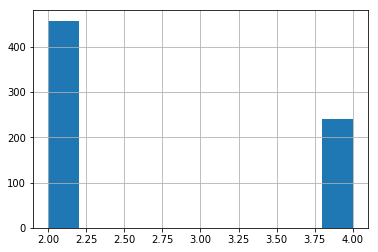

In [145]:
bc_data['Class'].hist()

### convert the datatype of Bare Nuclei to `int`

In [151]:
# bc_data['Bare Nuclei']
bc_data['Bare Nuclei'] = bc_data['Bare Nuclei'].astype(int)
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


### Standardization of Data (Use Standard Scaler)

In [152]:
StandardScaler().fit(bc_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AC69A4C18>,
      dtype=object)

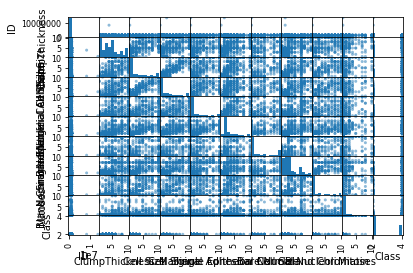

In [153]:
pd.plotting.scatter_matrix(bc_data)

In [157]:
bc_data.corr()
# bc_data has strong colinearity between Cell Size & Cell Shape - as apparent from scatter matrix above & bc_data.corr() values
# Hence Dropping 'Cell Size'
bc_data = bc_data.drop('Cell Size', axis = 1)

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Shape,-0.041576,0.654589,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


### Divide the dataset into feature set and target set

In [158]:
# Y = bc_data['Class']
X = bc_data.drop('Class', axis = 1)
Y = bc_data.pop('Class')

### Divide the Training and Test sets in 70:30 

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
X_train.head()

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
146,1185609,3,5,2,6,8,4,1,1
347,831268,1,1,1,1,1,1,3,1
286,529329,10,10,10,10,10,4,10,10
165,1197979,4,1,1,2,2,3,2,1
493,1142706,5,10,10,6,10,6,5,2


### Model 1 : Implement a default Decision Tree model with no attributes

In [162]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

### Check the feature importances of the Decision Tree model

In [163]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Check the training & test accuracy of model 1 

In [165]:
Y_pred_train = dt_model.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train, Y_pred_train)
print(accuracy_train)

1.0


In [166]:
Y_pred = dt_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9666666666666667


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [167]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes = 5)

### Check the training & test accuracy of model 2

In [168]:
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [171]:
Y_pred_train = dt_model2.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train, Y_pred_train)
print(accuracy_train)

0.9631901840490797


In [172]:
Y_pred = dt_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9666666666666667


### Print the confusion matrix of model 1 and model 2

In [174]:
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[135   2]
 [  5  68]]
